In [28]:
import tensorflow as tf
import PIL
import random

In [29]:
import numpy as np
def load_image(img_file, target_size=(224,224)):
    X = np.zeros((1, *target_size, 3))
    X[0, ] = np.asarray(tf.keras.preprocessing.image.load_img(
        img_file, 
        target_size=target_size)
    )
    X = tf.keras.applications.mobilenet.preprocess_input(X)
    return X

import os
def ensure_folder_exists(folder):
    if not os.path.exists(folder):
        os.makedirs(folder)

In [30]:
model = tf.keras.applications.mobilenet.MobileNet()
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [31]:
dog_image_id = os.listdir('images/dogs')[0]
dog_image = load_image(os.path.join('images/dogs',dog_image_id))
print(f'shape: {dog_image.shape}')
print(f'type: {type(dog_image)}')
model.predict(dog_image)

shape: (1, 224, 224, 3)
type: <class 'numpy.ndarray'>


array([[3.87139742e-08, 8.98178532e-10, 2.19876628e-09, 9.39951894e-10,
        1.93474181e-10, 1.37576650e-09, 1.30338951e-09, 1.68800932e-06,
        4.52936092e-06, 4.61025351e-08, 1.88511451e-09, 2.64371164e-10,
        1.00046617e-10, 2.33160620e-08, 4.92444807e-10, 2.16089077e-07,
        1.00355564e-08, 1.01378301e-08, 3.76002646e-07, 1.15165157e-08,
        4.40855104e-08, 4.64791050e-08, 3.23376241e-07, 2.96595645e-05,
        3.15028444e-07, 2.66222655e-10, 3.15914739e-09, 6.96539217e-08,
        5.34833733e-09, 3.34356032e-09, 2.20409575e-08, 3.67159436e-09,
        1.20719434e-08, 7.06001702e-10, 5.18240206e-09, 5.13490583e-08,
        2.19268212e-08, 7.85268206e-09, 4.13869605e-09, 1.82944504e-09,
        4.82213425e-09, 2.09608131e-09, 4.28018154e-08, 5.32184217e-08,
        6.03638028e-08, 3.25873479e-08, 1.28062529e-08, 5.67500436e-10,
        2.06860349e-07, 2.77020860e-08, 2.84229191e-08, 4.88104268e-09,
        1.47089025e-08, 1.37342049e-08, 3.34697403e-09, 5.291797

In [34]:
model = tf.keras.applications.mobilenet.MobileNet(
  input_shape=(224, 224, 3), 
  include_top=False, 
  pooling='avg'
)

In [35]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Dropout, Dense, Softmax)
x = Dropout(rate=0.4)(model.output)
x = Dense(2)(x)
x = Softmax()(x)
model= Model(model.inputs, x)

In [36]:
for layer in model.layers[:-3]:
    layer.trainable = False

In [37]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(lr=0.001),
    loss='categorical_crossentropy'
)

C:\Users\wmm\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [56]:

from tensorflow.keras.applications import mobilenet as _mobilenet

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=_mobilenet.preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

ensure_folder_exists('training_aug')
training = datagen.flow_from_directory( 
    './images', 
    target_size=(224, 224),
    save_to_dir='./training_aug',
    subset='training'
) 

ensure_folder_exists('validation_aug')
validation = datagen.flow_from_directory( 
    './images',
    target_size=(224, 224),
    save_to_dir='./validation_aug',
    subset='validation'
) 

Found 440 images belonging to 2 classes.
Found 48 images belonging to 2 classes.


In [57]:
from keras_tqdm import TQDMNotebookCallback

batch_size = 32

history = model.fit(
    x=training,
    steps_per_epoch=training.samples // batch_size,
    epochs=10,
    
    validation_data=validation,
    validation_steps=validation.samples // batch_size
)

Epoch 1/10
13/13 [==============================] - 18s 1s/step - loss: 0.0346 - val_loss: 0.0511
Epoch 2/10
13/13 [==============================] - 16s 1s/step - loss: 0.0301 - val_loss: 0.0451
Epoch 3/10
13/13 [==============================] - 17s 1s/step - loss: 0.0271 - val_loss: 0.0250
Epoch 4/10
13/13 [==============================] - 16s 1s/step - loss: 0.0190 - val_loss: 0.0095
Epoch 5/10
13/13 [==============================] - 16s 1s/step - loss: 0.0192 - val_loss: 0.0203
Epoch 6/10
13/13 [==============================] - 16s 1s/step - loss: 0.0171 - val_loss: 0.0208
Epoch 7/10
13/13 [==============================] - 19s 1s/step - loss: 0.0112 - val_loss: 0.0224
Epoch 8/10
13/13 [==============================] - 19s 1s/step - loss: 0.0115 - val_loss: 0.0257
Epoch 9/10
13/13 [==============================] - 17s 1s/step - loss: 0.0152 - val_loss: 0.0220
Epoch 10/10
13/13 [==============================] - 17s 1s/step - loss: 0.0112 - val_loss: 0.0150


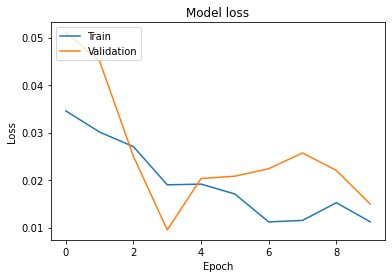

In [58]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [61]:
random_cat = random.choice(os.listdir('images/cat/'))
cat_path = os.path.join('images/cat',random_cat)
cat = load_image(cat_path)
random_dog = random.choice(os.listdir('images/dogs/'))
dog_path = os.path.join('images/dogs',random_dog)
dog = load_image(dog_path)

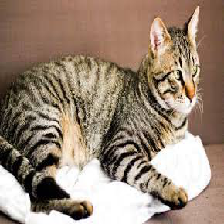

In [62]:
tf.keras.preprocessing.image.load_img(cat_path, target_size=(224,224))

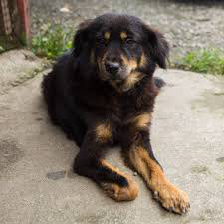

In [63]:
tf.keras.preprocessing.image.load_img(dog_path, target_size=(224,224))

In [64]:
print(f'''cat:{np.round(model.predict(cat),2)}''')

cat:[[1. 0.]]


In [65]:
print(f'''dog:{np.round(model.predict(dog),2)}''')

dog:[[0. 1.]]


In [66]:
fox_path = 'sheep.jpg'
fox = load_image(fox_path)

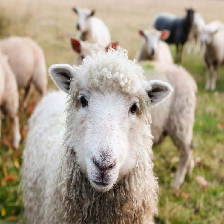

In [67]:
tf.keras.preprocessing.image.load_img(fox_path, target_size=(224,224))

In [68]:
print(f'''fox:{np.round(model.predict(fox),2)}''')

fox:[[0. 1.]]
